# EDA

In [24]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [15]:
PATH ='/opt/ml/level3_Final_project/final-project-level3-recsys-09/'
df = pd.read_csv(PATH + 'useritem.csv')
df.head()

,Unnamed: 0,item_id,item_name,playtime_forever,playtime_2weeks,userid
0,0,10,Counter-Strike,6,0,76561197970982479
1,1,20,Team Fortress Classic,0,0,76561197970982479
2,2,30,Day of Defeat,7,0,76561197970982479
3,3,40,Deathmatch Classic,0,0,76561197970982479
4,4,50,Half-Life: Opposing Force,0,0,76561197970982479
...,...,...,...,...,...,...
5153204,5153204,346330,BrainBread 2,0,0,76561198329548331
5153205,5153205,373330,All Is Dust,0,0,76561198329548331
5153206,5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331
5153207,5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331


In [16]:
# 총 item 개수
item_nums = df['item_id'].nunique()
item_nums

10978

- 아이템 보유 개수 20개 이하 필터링
- 희소행렬의 정의? 유저의 총 아이템 보유 개수 / 유저수 x 아이템 수
- 희소행렬을 만들 필요가 있을까? 필터링 된 df의 로우가 유저의 총 아이템 보유 개수

## STEP1 : 필터링

In [17]:
df.columns

Index(['Unnamed: 0', 'item_id', 'item_name', 'playtime_forever',
       'playtime_2weeks', 'userid'],
      dtype='object')

In [18]:
df = df.loc[:, ['item_id', 'userid']]
df

,item_id,userid
0,10,76561197970982479
1,20,76561197970982479
2,30,76561197970982479
3,40,76561197970982479
4,50,76561197970982479
...,...,...
5153204,346330,76561198329548331
5153205,373330,76561198329548331
5153206,388490,76561198329548331
5153207,521570,76561198329548331


In [19]:
df_filter = df.groupby('userid').agg('count').sort_values('item_id', ascending=False)
df = df_filter[df_filter['item_id'] > 20]

In [20]:
user_nums = df.shape[0]
user_item = df['item_id'].sum()
user_item

4956727

In [25]:
# 희소행렬 비율
ratio_ = (user_item / (user_nums * item_nums)) * 100
ratio_ 

0.9440973854756988

## 희소행렬 시각화

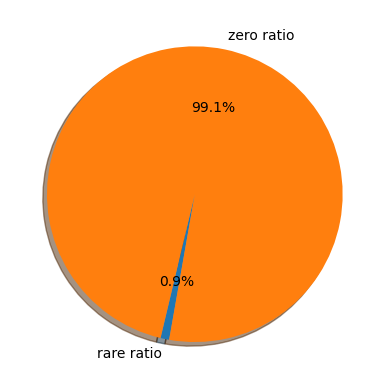

In [30]:
ratio = [ratio_, 100-ratio_]
labels = ['rare ratio', 'zero ratio']

plt.pie(ratio, labels = labels,autopct='%.1f%%', startangle=260, counterclock=False,  shadow=True)
plt.show()

- 희소행렬 비율 분석 필요

## STEP 2

- 어떤 요소를 시각화해야 될까?